In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances

sns.set_style('whitegrid')

In [5]:
df = pd.read_csv('/Users/naghmehnikpour/Downloads/flight-delays/flights.csv', low_memory=False)
print(df.columns)
df.head()

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
X_columns = ['DAY_OF_WEEK', 'MONTH', 'SCHEDULED_TIME', 'DISTANCE', 'AIRLINE']

In [7]:
# remove NaNs
df = df[X_columns]
df = df.dropna()
df = df.set_index(['AIRLINE'])
df.head()


,DAY_OF_WEEK,MONTH,SCHEDULED_TIME,DISTANCE
AIRLINE,,,,
AS,4,1,205.0,1448
AA,4,1,280.0,2330
US,4,1,286.0,2296
AA,4,1,285.0,2342
AS,4,1,235.0,1448


In [8]:

# normalize the columns
X_columns = list(df.columns)
df_norm = df.copy()
for col in X_columns:
    df_norm[col] = StandardScaler().fit_transform(df_norm[col].values.reshape(-1, 1))

print(df.shape)
df_norm.head()

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(5819073, 4)


,DAY_OF_WEEK,MONTH,SCHEDULED_TIME,DISTANCE
AIRLINE,,,,
AS,0.036735,-1.622281,0.841825,1.029384
AA,0.036735,-1.622281,1.839025,2.480556
US,0.036735,-1.622281,1.918801,2.424615
AA,0.036735,-1.622281,1.905505,2.500300
AS,0.036735,-1.622281,1.240705,1.029384


In [10]:
k = 4
kmeans = KMeans(n_clusters=k).fit(df_norm.values)

print(set(kmeans.labels_))
print(collections.Counter(kmeans.labels_))

df_results = df.copy()
df_norm['cluster'] = kmeans.labels_
df_results['cluster'] = kmeans.labels_

{0, 1, 2, 3}
Counter({3: 1631643, 2: 1627025, 1: 1621075, 0: 939330})


[('WN', 216915), ('DL', 139611), ('AA', 126948), ('OO', 112435), ('EV', 106506)]
[('WN', 228869), ('EV', 150424), ('OO', 144400), ('DL', 143796), ('MQ', 84115)]
[('WN', 228005), ('DL', 141224), ('EV', 127026), ('OO', 117466), ('MQ', 68927)]
[('WN', 150153), ('AA', 123849), ('DL', 98647), ('UA', 96315), ('B6', 52138)]
[('UA', 114925), ('AA', 90421), ('DL', 87321), ('WN', 39230), ('B6', 37560)]
[('AA', 148712), ('WN', 147989), ('DL', 98571), ('UA', 98386), ('B6', 47639)]
[('WN', 250694), ('DL', 166711), ('EV', 151462), ('OO', 149295), ('AA', 118251)]
DAY_OF_WEEK


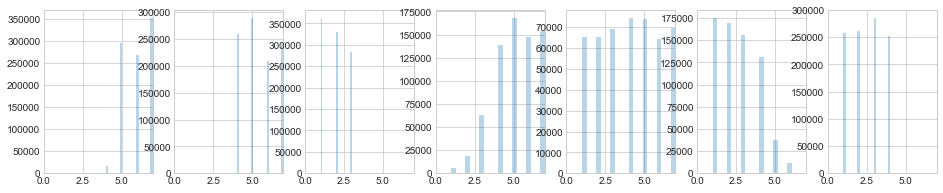

MONTH


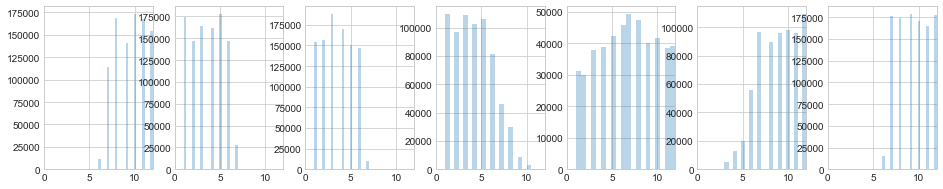

SCHEDULED_TIME


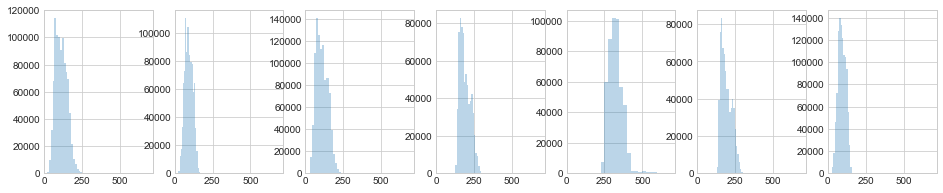

DISTANCE


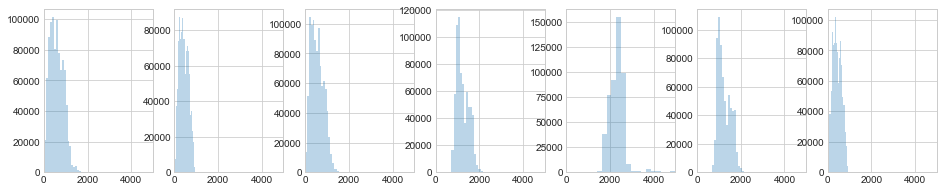

In [79]:
# Analyze the results
df_results = df_results.reset_index()
for cluster in sorted(set(kmeans.labels_)):
    print(collections.Counter(df_results[df_results['cluster']==cluster]['AIRLINE']).most_common(5))

n_clusters = len(set(kmeans.labels_))
for col in X_columns:
    print(col)
    i = 1
    plt.figure(figsize=(16,3))
    for cluster in sorted(set(kmeans.labels_)):
        plt.subplot(1, n_clusters, i)
        plt.xlim([0,df_results[col].max()])
        plt.hist(df_results[df_results['cluster']==cluster][col], label=str(cluster), alpha=0.3, bins=20)
        i += 1
    plt.show()

In [80]:
# Analyze the centroids
df_results.groupby('cluster').mean().round(2).T

cluster,0,1,2,3,4,5,6
DAY_OF_WEEK,6.03,5.43,1.92,5.17,4.03,2.59,2.50
MONTH,9.58,3.57,3.50,3.94,6.72,8.99,9.43
SCHEDULED_TIME,113.95,93.28,109.53,192.83,323.12,191.84,93.09
DISTANCE,595.76,434.66,559.50,1226.86,2309.31,1222.64,430.83


#### The above clustering highlights a couple of notes:

-It seems that most of the short flights are clustered at the beginning of the week (Mon to Thurs, clusters 0, 1, 2, and 6) and longer flights closer to weekend (Fri, Sat and Sun, clusters 3 to 5).

-Most of the long flights (cluster 4) are taken in June and mostly July which makes perfect sense with most people taking their summer vacation in July.

DAY_OF_WEEK


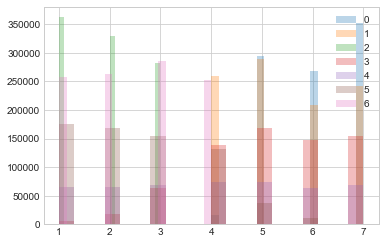

MONTH


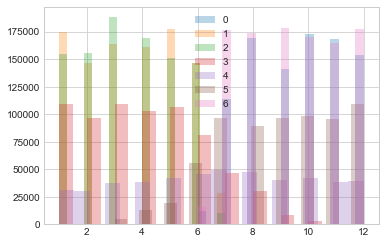

SCHEDULED_TIME


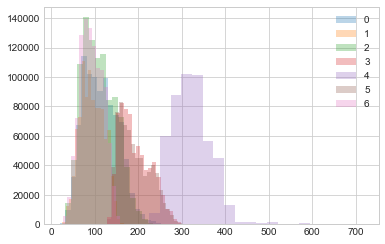

DISTANCE


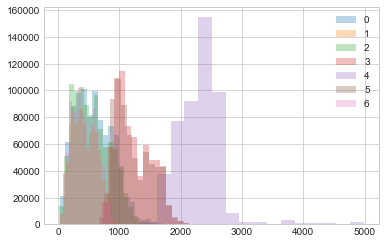

In [81]:
for col in X_columns:
    print(col)
    for cluster in set(kmeans.labels_):
        plt.hist(df_results[df_results['cluster']==cluster][col], label=str(cluster), alpha=0.3, bins=20)
    plt.legend()
    plt.show()

In [82]:
# Inter-Cluster
centroids = []
for cluster in sorted(set(kmeans.labels_)):
    centroids.append(df_norm[df_norm['cluster']==cluster][X_columns].mean().values)
distances = []
for c1 in centroids:
    for c2 in centroids:
        distances.append(euclidean_distances(c1.reshape(-1, 1), c2.reshape(-1, 1))[0][0])
print('Inter Cluster distance', np.mean(distances))

# Intra-Cluster
distances = []
for cluster in sorted(set(kmeans.labels_)):
    df_filter = df_norm[df_norm['cluster']==cluster]
    centroid = df_filter[X_columns].mean().values
    for k, v in df_filter[X_columns].iterrows():
        distances.append(euclidean_distances(centroid.reshape(-1, 1), v.values.reshape(-1, 1))[0][0])
print('Intra Cluster distance', np.mean(distances))

# Inertia
distances = []
for cluster in sorted(set(kmeans.labels_)):
    df_filter = df_norm[df_norm['cluster']==cluster]
    centroid = df_filter[X_columns].mean().values
    for k, v in df_filter[X_columns].iterrows():
        distances.append(euclidean_distances(centroid.reshape(1, -1), v.values.reshape(1, -1), squared=True)[0][0])
print('Inertia', np.sum(distances))

Inter Cluster distance 0.8520487002678429
Intra Cluster distance 0.49762963299557283
Inertia 6523198.0633281525


In [ ]:
inertia = []
for k in range(2, 100):
    kmeans = KMeans(n_clusters=k).fit(df_norm.values)
    inertia.append(kmeans.inertia_)
plt.plot(inertia)
plt.show()